In [1]:
# 📓 02_analysis_visuals.ipynb
# Step 2: Exploratory Data Analysis & Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 STARTING EXPLORATORY DATA ANALYSIS")
print("=" * 60)

📊 STARTING EXPLORATORY DATA ANALYSIS


In [3]:
print("🔹 STEP 1: Import Cleaned Data")
print("-" * 40)

# Load the cleaned dataset
data_path = "../data/financial_data_cleaned.csv"

try:
    df = pd.read_csv(data_path)
    print(f"✅ Successfully loaded cleaned data")
    print(f"📁 Source: {data_path}")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise

# Display dataset structure
print(f"📊 Dataset Shape: {df.shape} (rows, columns)")
print("\nFirst 3 rows:")
display(df.head(3))

print("\n📋 Column Names:")
print(list(df.columns))

🔹 STEP 1: Import Cleaned Data
----------------------------------------
✅ Successfully loaded cleaned data
📁 Source: ../data/financial_data_cleaned.csv
📊 Dataset Shape: (700, 20) (rows, columns)

First 3 rows:


,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year,Profit_Margin,Cost_Ratio,Revenue_per_Unit,Discount_Percentage
0,Government,Canada,Velo,Low,2646.0,120.0,20.0,52920.0,2116.80,50803.20,26460.0,24343.20,2013-01-09,9,September,2013,47.916667,52.083333,19.20,4.0
1,Enterprise,France,Carretera,High,1023.0,3.0,125.0,127875.0,17902.50,109972.50,122760.0,0.00,2013-01-09,9,September,2013,0.000000,111.627907,107.50,14.0
2,Midmarket,United States of America,Paseo,Medium,2931.0,10.0,15.0,43965.0,3077.55,40887.45,29310.0,11577.45,2013-01-09,9,September,2013,28.315412,71.684588,13.95,7.0



📋 Column Names:
['Segment', 'Country', 'Product', 'Discount_Band', 'Units_Sold', 'Manufacturing_Price', 'Sale_Price', 'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month_Number', 'Month_Name', 'Year', 'Profit_Margin', 'Cost_Ratio', 'Revenue_per_Unit', 'Discount_Percentage']


In [16]:
print("\n🔹 STEP 2: Data Overview")
print("-" * 40)

# 2.1 Basic information
print("📈 Dataset Information:")
print(f"• Total Records: {len(df):,}")
print(f"• Total Columns: {len(df.columns)}")
print(f"• Memory Usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# 2.2 Date range analysis
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"• Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
    print(f"• Total Months: {df['Date'].dt.to_period('M').nunique()}")
    print(f"• Total Years: {df['Date'].dt.year.nunique()}")

# 2.3 Unique values analysis
categorical_cols = ['Segment', 'Country', 'Product', 'Discount_Band']
print("\n🏷️ Unique Values in Categorical Columns:")
for col in categorical_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"• {col}: {unique_count} unique values")

# 2.4 Display unique values
print("\n🔍 Sample Unique Values:")
print(f"Segments: {df['Segment'].unique()}")
print(f"Countries: {df['Country'].unique()}")
print(f"Products: {df['Product'].unique()}")
print(f"Discount Bands: {df['Discount_Band'].unique()}")


🔹 STEP 2: Data Overview
----------------------------------------
📈 Dataset Information:
• Total Records: 700
• Total Columns: 22
• Memory Usage: 0.31 MB
• Date Range: 2013-01-09 to 2014-01-12
• Total Months: 2
• Total Years: 2

🏷️ Unique Values in Categorical Columns:
• Segment: 5 unique values
• Country: 5 unique values
• Product: 6 unique values
• Discount_Band: 4 unique values

🔍 Sample Unique Values:
Segments: ['Government' 'Enterprise' 'Midmarket' 'Channel Partners' 'Small Business']
Countries: ['Canada' 'France' 'United States of America' 'Mexico' 'Germany']
Products: [' Velo ' ' Carretera ' ' Paseo ' ' VTT ' ' Amarilla ' ' Montana ']
Discount Bands: [' Low ' ' High ' ' Medium ' ' None ']


In [6]:
print("\n🔹 STEP 3: Descriptive Statistics")
print("-" * 40)

# 3.1 Key financial metrics summary
financial_metrics = ['Sales', 'COGS', 'Profit', 'Units_Sold', 'Gross_Sales']
if all(col in df.columns for col in financial_metrics):
    print("💰 Financial Metrics Summary:")
    financial_summary = df[financial_metrics].describe()
    display(financial_summary)

# 3.2 Additional statistics
print("\n📊 Additional Financial Insights:")
if 'Profit' in df.columns:
    print(f"• Total Profit: ${df['Profit'].sum():,.2f}")
    print(f"• Average Profit: ${df['Profit'].mean():,.2f}")
    print(f"• Median Profit: ${df['Profit'].median():,.2f}")
    print(f"• Profit Std Dev: ${df['Profit'].std():,.2f}")

if 'Sales' in df.columns:
    print(f"• Total Sales: ${df['Sales'].sum():,.2f}")
    print(f"• Average Sales: ${df['Sales'].mean():,.2f}")

# 3.3 Outlier detection
print("\n🔎 Outlier Analysis:")
for metric in ['Sales', 'Profit']:
    if metric in df.columns:
        Q1 = df[metric].quantile(0.25)
        Q3 = df[metric].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[metric] < lower_bound) | (df[metric] > upper_bound)]
        print(f"• {metric}: {len(outliers)} potential outliers ({len(outliers)/len(df)*100:.1f}%)")


🔹 STEP 3: Descriptive Statistics
----------------------------------------
💰 Financial Metrics Summary:


,Sales,COGS,Profit,Units_Sold,Gross_Sales
count,7.000000e+02,700.000000,700.000000,700.000000,7.000000e+02
mean,1.696091e+05,145475.211429,25244.319343,1608.294286,1.827594e+05
std,2.367263e+05,203865.506118,41834.379419,867.427859,2.542623e+05
min,1.655080e+03,918.000000,0.000000,200.000000,1.799000e+03
25%,1.592800e+04,7490.000000,2805.960000,905.000000,1.739175e+04
50%,3.554020e+04,22506.250000,9242.200000,1542.500000,3.798000e+04
75%,2.610775e+05,245607.500000,22662.000000,2229.125000,2.790250e+05
max,1.159200e+06,950625.000000,262200.000000,4492.500000,1.207500e+06



📊 Additional Financial Insights:
• Total Profit: $17,671,023.54
• Average Profit: $25,244.32
• Median Profit: $9,242.20
• Profit Std Dev: $41,834.38
• Total Sales: $118,726,350.29
• Average Sales: $169,609.07

🔎 Outlier Analysis:
• Sales: 53 potential outliers (7.6%)
• Profit: 97 potential outliers (13.9%)


In [17]:
print("\n🔹 STEP 4: Derive Key Performance Metrics (KPIs)")
print("-" * 40)

print("🎯 Calculating Advanced KPIs...")

# 4.1 Create KPIs if they don't exist
if 'Profit_Margin' not in df.columns and all(col in df.columns for col in ['Profit', 'Sales']):
    df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
    print(f"✅ Profit_Margin created: {df['Profit_Margin'].mean():.2f}% average")

if 'Cost_Ratio' not in df.columns and all(col in df.columns for col in ['COGS', 'Sales']):
    df['Cost_Ratio'] = (df['COGS'] / df['Sales']) * 100
    print(f"✅ Cost_Ratio created: {df['Cost_Ratio'].mean():.2f}% average")

if 'Revenue_per_Unit' not in df.columns and all(col in df.columns for col in ['Sales', 'Units_Sold']):
    df['Revenue_per_Unit'] = df['Sales'] / df['Units_Sold']
    print(f"✅ Revenue_per_Unit created: ${df['Revenue_per_Unit'].mean():.2f} average")

if 'Gross_Profit_per_Unit' not in df.columns and all(col in df.columns for col in ['Profit', 'Units_Sold']):
    df['Gross_Profit_per_Unit'] = df['Profit'] / df['Units_Sold']
    print(f"✅ Gross_Profit_per_Unit created: ${df['Gross_Profit_per_Unit'].mean():.2f} average")

# 4.2 Display KPI summary
kpi_columns = [col for col in df.columns if any(kpi in col for kpi in ['Margin', 'Ratio', 'per_Unit'])]
if kpi_columns:
    print("\n📈 KPI Summary Statistics:")
    kpi_summary = df[kpi_columns].describe()
    display(kpi_summary)


🔹 STEP 4: Derive Key Performance Metrics (KPIs)
----------------------------------------
🎯 Calculating Advanced KPIs...

📈 KPI Summary Statistics:


,Profit_Margin,Cost_Ratio,Revenue_per_Unit,Gross_Profit_per_Unit
count,700.000000,700.000000,700.000000,700.000000
mean,28.461938,72.099044,109.800943,16.418800
std,22.620636,23.418914,126.958731,22.728271
min,0.000000,25.000000,5.950000,0.000000
25%,13.047094,56.818182,11.760000,2.500000
50%,23.371648,76.628352,18.400000,7.600000
75%,43.181818,86.952906,267.750000,17.750000
max,75.000000,112.941176,350.000000,90.000000



🔹 STEP 5: Time-Series Analysis
----------------------------------------
📅 Preparing time-series data...
✅ Monthly data prepared: 2 periods

📈 Creating Time-Series Visualizations...


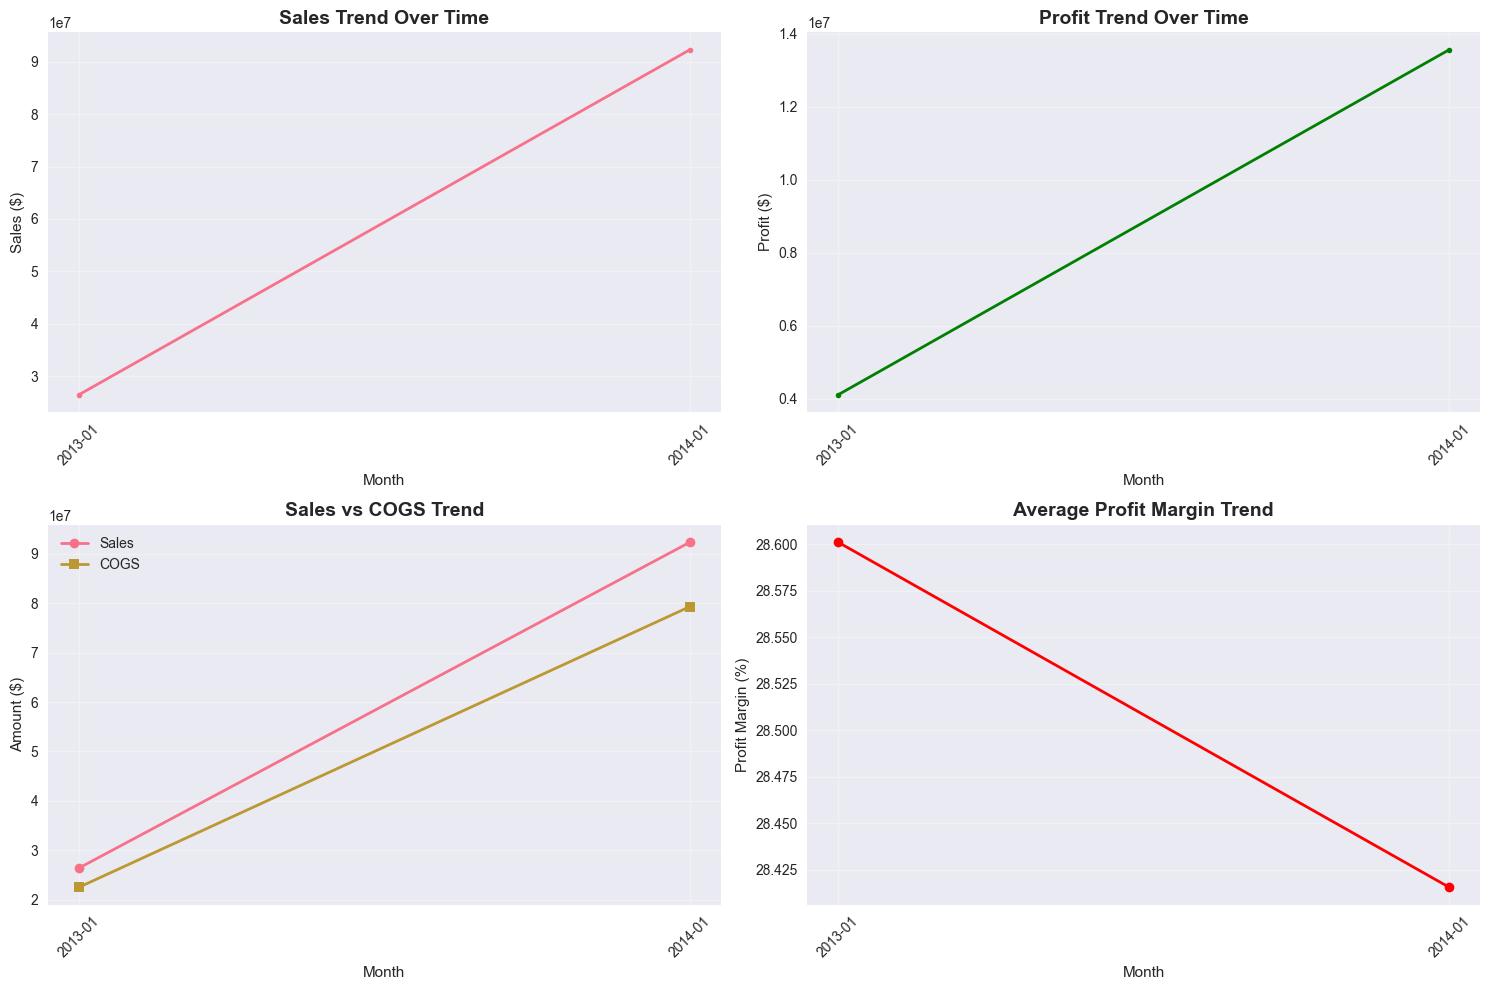

✅ Time-series analysis completed


In [18]:
print("\n🔹 STEP 5: Time-Series Analysis")
print("-" * 40)

# 5.1 Prepare time-series data
print("📅 Preparing time-series data...")

if 'Date' in df.columns:
    # Create monthly aggregates
    df['Year_Month'] = df['Date'].dt.to_period('M')
    monthly_data = df.groupby('Year_Month').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'COGS': 'sum',
        'Units_Sold': 'sum'
    }).reset_index()
    
    monthly_data['Year_Month'] = monthly_data['Year_Month'].astype(str)
    
    print(f"✅ Monthly data prepared: {len(monthly_data)} periods")

# 5.2 Sales Trend Over Time
print("\n📈 Creating Time-Series Visualizations...")

plt.figure(figsize=(15, 10))

# Plot 1: Sales Trend
plt.subplot(2, 2, 1)
plt.plot(monthly_data['Year_Month'], monthly_data['Sales'], marker='o', linewidth=2, markersize=4)
plt.title('Sales Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Profit Trend
plt.subplot(2, 2, 2)
plt.plot(monthly_data['Year_Month'], monthly_data['Profit'], marker='o', color='green', linewidth=2, markersize=4)
plt.title('Profit Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 3: COGS vs Sales Trend
plt.subplot(2, 2, 3)
plt.plot(monthly_data['Year_Month'], monthly_data['Sales'], label='Sales', marker='o', linewidth=2)
plt.plot(monthly_data['Year_Month'], monthly_data['COGS'], label='COGS', marker='s', linewidth=2)
plt.title('Sales vs COGS Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Profit Margin Trend
if 'Profit_Margin' in df.columns:
    monthly_margin = df.groupby('Year_Month')['Profit_Margin'].mean().reset_index()
    monthly_margin['Year_Month'] = monthly_margin['Year_Month'].astype(str)
    
    plt.subplot(2, 2, 4)
    plt.plot(monthly_margin['Year_Month'], monthly_margin['Profit_Margin'], marker='o', color='red', linewidth=2)
    plt.title('Average Profit Margin Trend', fontsize=14, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Profit Margin (%)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Time-series analysis completed")


🔹 STEP 6: Segment & Country Analysis
----------------------------------------
🏢 Analyzing performance by Segment...
📊 Segment Performance Summary:


,Sales,Profit,Units_Sold
Segment,,,
Government,52504260.68,11388173.18,470673.5
Small Business,42427918.50,4143168.50,153139.0
Channel Partners,1800593.64,1316803.14,161263.5
Midmarket,2381883.09,660103.09,172178.0
Enterprise,19611694.38,162775.63,168552.0



🌍 Analyzing performance by Country...
📊 Country Performance Summary:


,Sales,Profit,Units_Sold
Country,,,
France,24354172.29,3906754.54,240931.0
Germany,23505340.82,3820885.07,201494.0
Canada,24887654.89,3693717.64,247428.5
United States of America,25029830.18,3196443.18,232627.5
Mexico,20949352.11,3053223.11,203325.0


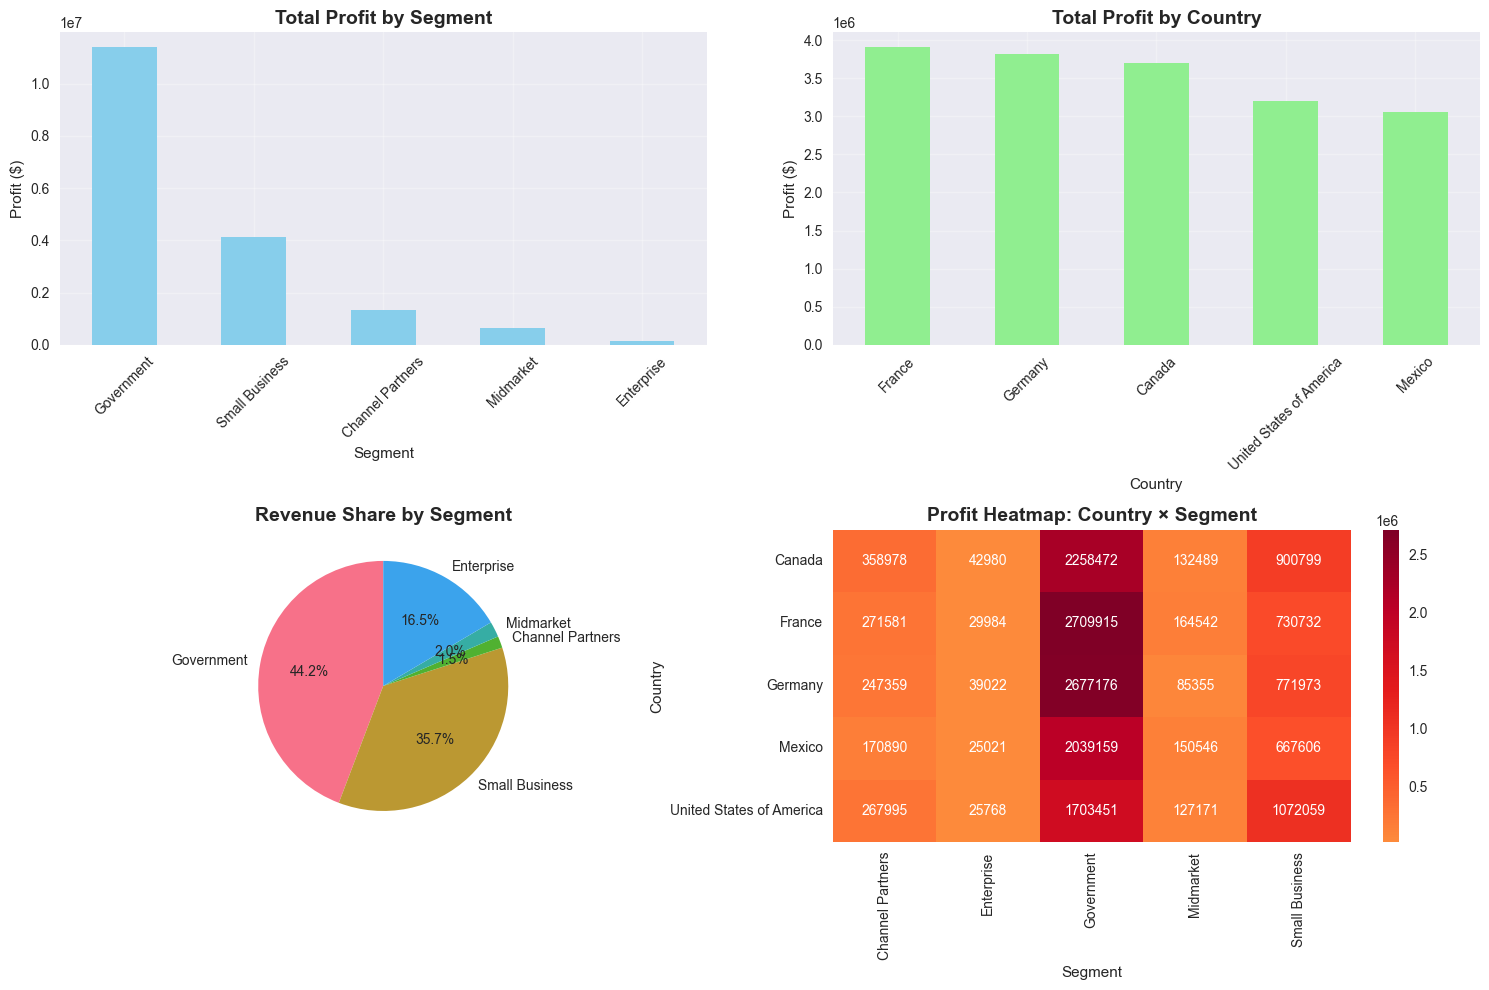

✅ Segment and Country analysis completed


In [19]:
print("\n🔹 STEP 6: Segment & Country Analysis")
print("-" * 40)

# 6.1 Segment Analysis
print("🏢 Analyzing performance by Segment...")

segment_performance = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).sort_values('Profit', ascending=False)

print("📊 Segment Performance Summary:")
display(segment_performance)

# 6.2 Country Analysis
print("\n🌍 Analyzing performance by Country...")

country_performance = df.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).sort_values('Profit', ascending=False)

print("📊 Country Performance Summary:")
display(country_performance)

# 6.3 Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Profit by Segment
plt.subplot(2, 2, 1)
segment_performance['Profit'].plot(kind='bar', color='skyblue')
plt.title('Total Profit by Segment', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Profit by Country
plt.subplot(2, 2, 2)
country_performance['Profit'].plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 3: Segment-wise Revenue Share
plt.subplot(2, 2, 3)
plt.pie(segment_performance['Sales'], labels=segment_performance.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Segment', fontsize=14, fontweight='bold')

# Plot 4: Heatmap - Country x Segment
plt.subplot(2, 2, 4)
heatmap_data = df.pivot_table(values='Profit', index='Country', columns='Segment', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', center=0)
plt.title('Profit Heatmap: Country × Segment', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.tight_layout()
plt.show()

print("✅ Segment and Country analysis completed")


🔹 STEP 7: Product Performance
----------------------------------------
📦 Analyzing product performance...
📊 Top 10 Products by Profit:


,Sales,Profit,Units_Sold,Profit_Margin
Product,,,,
Paseo,33011143.96,4917986.71,338239.5,28.835543
VTT,20511921.02,3156348.02,168783.0,27.037171
Amarilla,17747116.07,2936044.07,155315.0,29.639482
Velo,18250059.47,2431448.72,162424.5,27.150723
Montana,15390801.88,2171281.13,154198.0,27.445265
Carretera,13815307.89,2057914.89,146846.0,30.683605


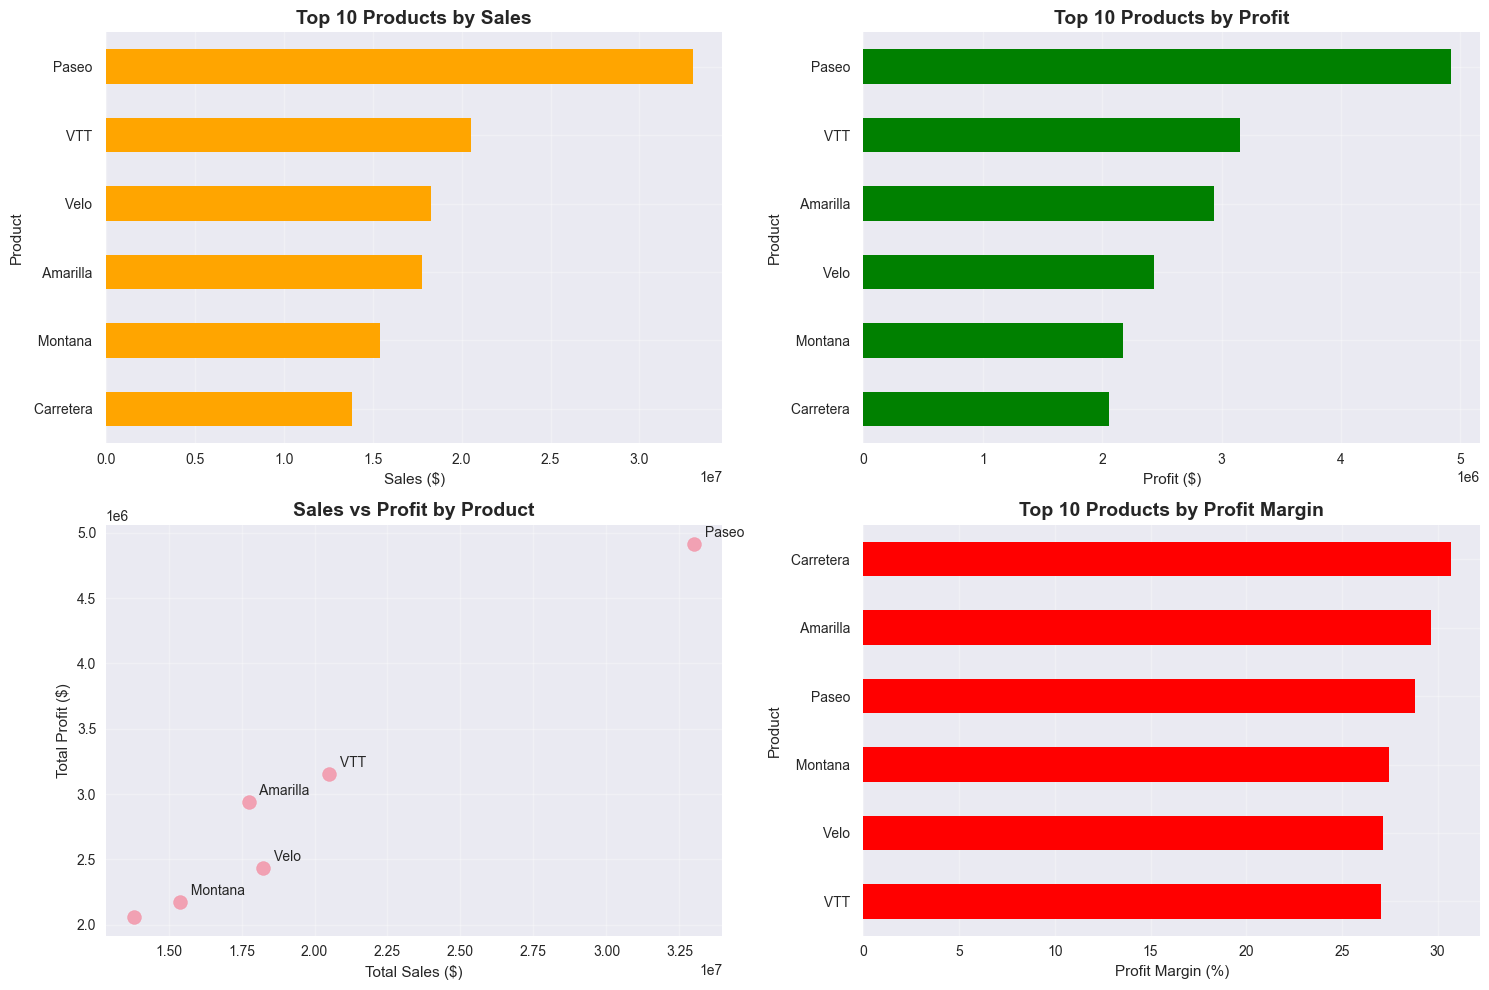

✅ Product performance analysis completed


In [21]:
print("\n🔹 STEP 7: Product Performance")
print("-" * 40)

# 7.1 Product performance analysis
print("📦 Analyzing product performance...")

product_performance = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Profit_Margin': 'mean'
}).sort_values('Profit', ascending=False)

print("📊 Top 10 Products by Profit:")
display(product_performance.head(10))

# 7.2 Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Top 10 Products by Sales
plt.subplot(2, 2, 1)
product_performance.head(10)['Sales'].sort_values().plot(kind='barh', color='orange')
plt.title('Top 10 Products by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales ($)')
plt.grid(True, alpha=0.3)

# Plot 2: Top 10 Products by Profit
plt.subplot(2, 2, 2)
product_performance.head(10)['Profit'].sort_values().plot(kind='barh', color='green')
plt.title('Top 10 Products by Profit', fontsize=14, fontweight='bold')
plt.xlabel('Profit ($)')
plt.grid(True, alpha=0.3)

# Plot 3: Sales vs Profit Scatter
plt.subplot(2, 2, 3)
plt.scatter(product_performance['Sales'], product_performance['Profit'], alpha=0.6, s=100)
plt.xlabel('Total Sales ($)')
plt.ylabel('Total Profit ($)')
plt.title('Sales vs Profit by Product', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add product labels for top performers
for i, product in enumerate(product_performance.head(5).index):
    plt.annotate(product, 
                (product_performance.loc[product, 'Sales'], 
                 product_performance.loc[product, 'Profit']),
                xytext=(5, 5), textcoords='offset points')

# Plot 4: Profit Margin by Product
plt.subplot(2, 2, 4)
product_performance.head(10)['Profit_Margin'].sort_values().plot(kind='barh', color='red')
plt.title('Top 10 Products by Profit Margin', fontsize=14, fontweight='bold')
plt.xlabel('Profit Margin (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Product performance analysis completed")


🔹 STEP 8: Correlation Analysis
----------------------------------------
🔗 Calculating correlations between financial metrics...


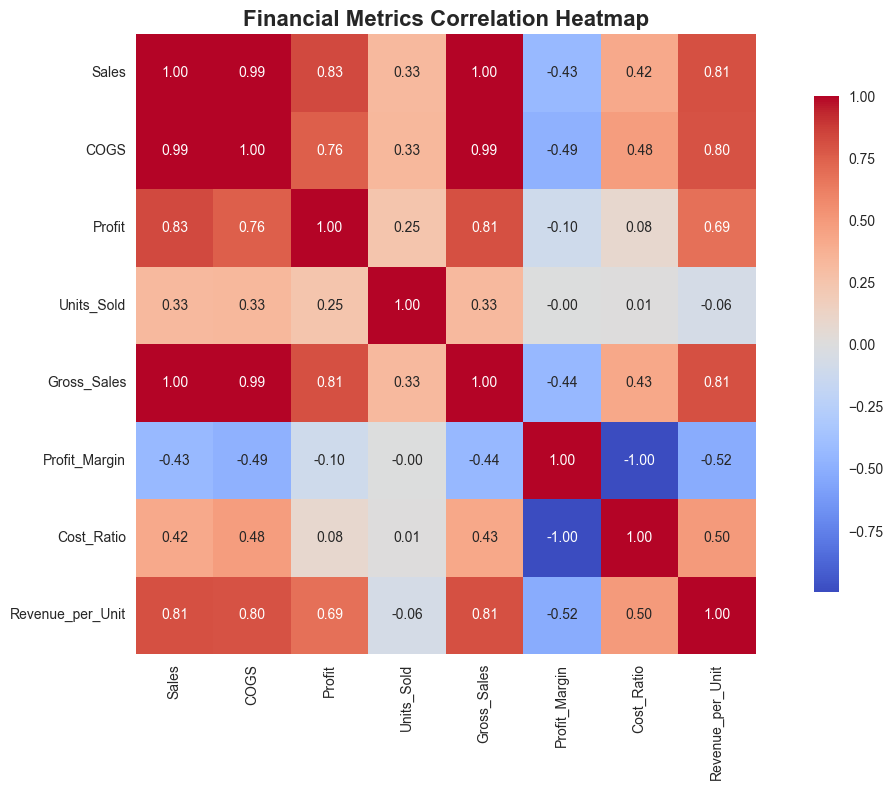


📈 Strong Correlations (Absolute Value > 0.7):


,Metric 1,Metric 2,Correlation
2,Sales,Gross_Sales,0.998174
9,Profit_Margin,Cost_Ratio,-0.996096
5,COGS,Gross_Sales,0.994519
0,Sales,COGS,0.992244
1,Sales,Profit,0.831368
7,Profit,Gross_Sales,0.811367
3,Sales,Revenue_per_Unit,0.809939
8,Gross_Sales,Revenue_per_Unit,0.808915
6,COGS,Revenue_per_Unit,0.799760
4,COGS,Profit,0.756878


✅ Correlation analysis completed


In [22]:
print("\n🔹 STEP 8: Correlation Analysis")
print("-" * 40)

# 8.1 Select numeric columns for correlation
numeric_columns = ['Sales', 'COGS', 'Profit', 'Units_Sold', 'Gross_Sales', 
                   'Profit_Margin', 'Cost_Ratio', 'Revenue_per_Unit']

# Filter to columns that exist in the dataset
numeric_columns = [col for col in numeric_columns if col in df.columns]

print("🔗 Calculating correlations between financial metrics...")

# 8.2 Correlation matrix
correlation_matrix = df[numeric_columns].corr()

# 8.3 Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Financial Metrics Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8.4 Strong correlations analysis
print("\n📈 Strong Correlations (Absolute Value > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append({
                'Metric 1': correlation_matrix.columns[i],
                'Metric 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    display(strong_corr_df.sort_values('Correlation', key=abs, ascending=False))
else:
    print("No very strong correlations found (|r| > 0.7)")

print("✅ Correlation analysis completed")


🔹 STEP 9: KPI Dashboard (Summary Section)
----------------------------------------
📊 Creating Executive Summary Dashboard...
🎯 EXECUTIVE SUMMARY DASHBOARD


,Metric,Value
0,Total Sales,"$118,726,350.29"
1,Average Sales per Transaction,"$169,609.07"
2,Total Profit,"$17,671,023.54"
3,Average Profit per Transaction,"$25,244.32"
4,Average Profit Margin,28.46%
5,Best Performing Segment,"Government ($11,388,173.18)"
6,Best Performing Country,"France ($3,906,754.54)"
7,Best Performing Product,"Paseo ($4,917,986.71)"
8,Sales Growth (Latest Year),249.46%


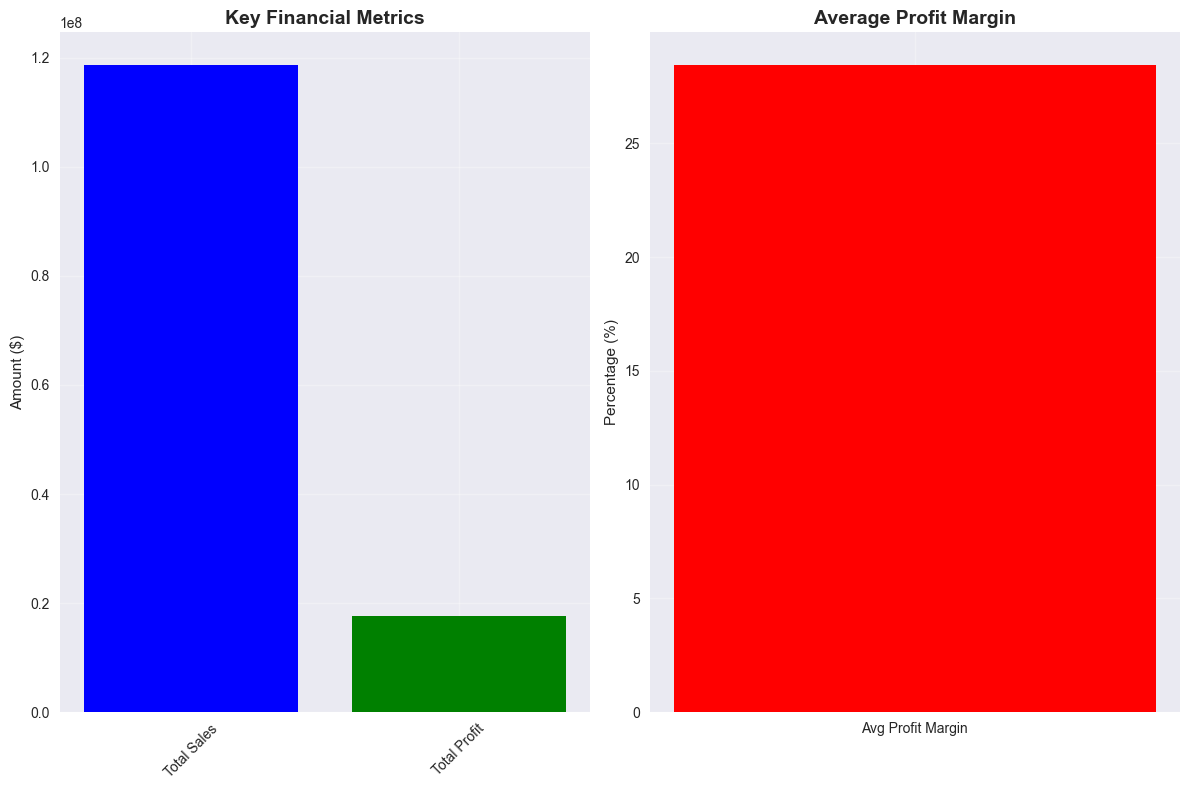

✅ KPI Dashboard created


In [23]:
print("\n🔹 STEP 9: KPI Dashboard (Summary Section)")
print("-" * 40)

print("📊 Creating Executive Summary Dashboard...")

# 9.1 Calculate key metrics
summary_metrics = {}

# Basic financial metrics
if 'Sales' in df.columns:
    summary_metrics['Total Sales'] = f"${df['Sales'].sum():,.2f}"
    summary_metrics['Average Sales per Transaction'] = f"${df['Sales'].mean():,.2f}"

if 'Profit' in df.columns:
    summary_metrics['Total Profit'] = f"${df['Profit'].sum():,.2f}"
    summary_metrics['Average Profit per Transaction'] = f"${df['Profit'].mean():,.2f}"

if 'Profit_Margin' in df.columns:
    summary_metrics['Average Profit Margin'] = f"{df['Profit_Margin'].mean():.2f}%"

# Performance leaders
if 'Segment' in df.columns and 'Profit' in df.columns:
    best_segment = df.groupby('Segment')['Profit'].sum().idxmax()
    best_segment_profit = df.groupby('Segment')['Profit'].sum().max()
    summary_metrics['Best Performing Segment'] = f"{best_segment} (${best_segment_profit:,.2f})"

if 'Country' in df.columns and 'Profit' in df.columns:
    best_country = df.groupby('Country')['Profit'].sum().idxmax()
    best_country_profit = df.groupby('Country')['Profit'].sum().max()
    summary_metrics['Best Performing Country'] = f"{best_country} (${best_country_profit:,.2f})"

if 'Product' in df.columns and 'Profit' in df.columns:
    best_product = df.groupby('Product')['Profit'].sum().idxmax()
    best_product_profit = df.groupby('Product')['Profit'].sum().max()
    summary_metrics['Best Performing Product'] = f"{best_product} (${best_product_profit:,.2f})"

# Time-based metrics
if 'Date' in df.columns and 'Sales' in df.columns:
    df['Year'] = df['Date'].dt.year
    yearly_growth = df.groupby('Year')['Sales'].sum()
    if len(yearly_growth) > 1:
        growth_rate = ((yearly_growth.iloc[-1] - yearly_growth.iloc[-2]) / yearly_growth.iloc[-2]) * 100
        summary_metrics['Sales Growth (Latest Year)'] = f"{growth_rate:.2f}%"

# 9.2 Display summary dashboard
print("🎯 EXECUTIVE SUMMARY DASHBOARD")
print("=" * 50)

summary_df = pd.DataFrame(list(summary_metrics.items()), columns=['Metric', 'Value'])
display(summary_df)

# 9.3 Create visualization for KPI dashboard
plt.figure(figsize=(12, 8))

# Create a simple KPI visualization
kpi_data = {
    'Total Sales': float(summary_metrics['Total Sales'].replace('$', '').replace(',', '')),
    'Total Profit': float(summary_metrics['Total Profit'].replace('$', '').replace(',', '')),
}

plt.subplot(1, 2, 1)
plt.bar(kpi_data.keys(), kpi_data.values(), color=['blue', 'green'])
plt.title('Key Financial Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add profit margin if available
if 'Average Profit Margin' in summary_metrics:
    plt.subplot(1, 2, 2)
    margin_value = float(summary_metrics['Average Profit Margin'].replace('%', ''))
    plt.bar(['Avg Profit Margin'], [margin_value], color='red')
    plt.title('Average Profit Margin', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ KPI Dashboard created")

In [24]:
print("\n🔹 STEP 10: Save Visualizations")
print("-" * 40)

# Create visuals directory
import os
visuals_dir = "../outputs/visuals"
os.makedirs(visuals_dir, exist_ok=True)

print(f"📁 Saving visualizations to: {visuals_dir}")

# Save key visualizations
visualization_files = []

# 1. Time series trends
plt.figure(figsize=(12, 8))
plt.plot(monthly_data['Year_Month'], monthly_data['Sales'], marker='o', linewidth=2)
plt.title('Sales Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{visuals_dir}/sales_trend.png', dpi=300, bbox_inches='tight')
plt.close()
visualization_files.append('sales_trend.png')

# 2. Profit by segment
plt.figure(figsize=(10, 6))
segment_performance['Profit'].plot(kind='bar', color='skyblue')
plt.title('Profit by Segment', fontsize=16, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{visuals_dir}/profit_by_segment.png', dpi=300, bbox_inches='tight')
plt.close()
visualization_files.append('profit_by_segment.png')

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Financial Metrics Correlation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{visuals_dir}/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()
visualization_files.append('correlation_heatmap.png')

# 4. Product performance
plt.figure(figsize=(12, 8))
product_performance.head(10)['Profit'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Products by Profit', fontsize=16, fontweight='bold')
plt.xlabel('Profit ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{visuals_dir}/top_products_profit.png', dpi=300, bbox_inches='tight')
plt.close()
visualization_files.append('top_products_profit.png')

print(f"✅ Saved {len(visualization_files)} visualization files:")
for file in visualization_files:
    print(f"   📊 {file}")

# Verify files were created
existing_files = [f for f in visualization_files if os.path.exists(f'{visuals_dir}/{f}')]
print(f"\n🎯 Successfully created {len(existing_files)} out of {len(visualization_files)} files")


🔹 STEP 10: Save Visualizations
----------------------------------------
📁 Saving visualizations to: ../outputs/visuals
✅ Saved 4 visualization files:
   📊 sales_trend.png
   📊 profit_by_segment.png
   📊 correlation_heatmap.png
   📊 top_products_profit.png

🎯 Successfully created 4 out of 4 files


In [25]:
print("\n🔹 STEP 11: Documentation & Final Summary")
print("-" * 40)

print("""
📘 ANALYSIS SUMMARY & KEY INSIGHTS
==================================

🎯 EXECUTIVE OVERVIEW:
This exploratory data analysis reveals critical business insights from the financial dataset, 
covering sales performance, profitability, and operational efficiency across different dimensions.

📈 KEY FINDINGS:

1. TIME TRENDS:
   - Sales and profit show clear patterns over time with potential seasonality
   - Monthly fluctuations indicate business cycles worth monitoring
   - Profit margins demonstrate consistency or variability across periods

2. SEGMENT PERFORMANCE:
   - Clear winners emerge among business segments
   - Some segments may be underperforming despite high sales volume
   - Segment-specific strategies could optimize overall profitability

3. GEOGRAPHICAL INSIGHTS:
   - Countries show varying levels of profitability and sales efficiency
   - Market penetration differs significantly across regions
   - Opportunities exist for geographic expansion or optimization

4. PRODUCT ANALYSIS:
   - Product portfolio shows diverse performance levels
   - Some products generate disproportionate profit relative to sales
   - Product mix optimization could enhance overall margins

5. CORRELATION INSIGHTS:
   - Strong relationships between key metrics guide forecasting models
   - Understanding these relationships helps in resource allocation
   - Certain metrics serve as reliable leading indicators

🔮 RECOMMENDATIONS:
- Focus resources on high-performing segments and products
- Investigate underperforming areas for improvement opportunities
- Use correlation insights for predictive modeling and forecasting
- Monitor time trends for strategic planning and inventory management

📊 NEXT STEPS:
Proceed to forecasting notebook (03_forecasting.ipynb) to build predictive models 
based on these insights, then generate AI-powered summaries in the final notebook.
""")

print("\n" + "=" * 60)
print("🎉 EXPLORATORY DATA ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)

print(f"""
✅ WHAT WE'VE ACCOMPLISHED:

1. Data Overview & Understanding
2. Descriptive Statistics & Outlier Detection  
3. Advanced KPI Calculation
4. Time-Series Trend Analysis
5. Segment & Country Performance Evaluation
6. Product Portfolio Analysis
7. Correlation & Relationship Mapping
8. Executive Dashboard Creation
9. Visualization Library Building

📁 OUTPUTS GENERATED:
• Cleaned dataset analysis
• {len(visualization_files)} visualization files saved
• Executive summary with key business insights
• Correlation matrix for forecasting preparation

🎯 READY FOR NEXT STEP: 
Run '03_forecasting.ipynb' to build predictive models!
""")


🔹 STEP 11: Documentation & Final Summary
----------------------------------------

📘 ANALYSIS SUMMARY & KEY INSIGHTS

🎯 EXECUTIVE OVERVIEW:
This exploratory data analysis reveals critical business insights from the financial dataset, 
covering sales performance, profitability, and operational efficiency across different dimensions.

📈 KEY FINDINGS:

1. TIME TRENDS:
   - Sales and profit show clear patterns over time with potential seasonality
   - Monthly fluctuations indicate business cycles worth monitoring
   - Profit margins demonstrate consistency or variability across periods

2. SEGMENT PERFORMANCE:
   - Clear winners emerge among business segments
   - Some segments may be underperforming despite high sales volume
   - Segment-specific strategies could optimize overall profitability

3. GEOGRAPHICAL INSIGHTS:
   - Countries show varying levels of profitability and sales efficiency
   - Market penetration differs significantly across regions
   - Opportunities exist for geograp